# Unit 5 - Financial Planning

In [51]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation
#from coinbase.wallet.client import Client


%matplotlib inline

In [52]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [53]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [54]:
# Crypto API URLs,
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

#FYI, for future use by me (Coinbase API code)
# coinbase_api_key = os.getenv("COINBASE_API_KEY")
# coinbase_secret_key = os.getenv("COINBASE_SECRET_KEY")
# client = Client(coinbase_api_key, coinbase_secret_key)
#price = client.get_spot_price(currency_pair = 'BTC-USD')

In [55]:
# Fetch current BTC price
btc_request = requests.get(btc_url).json()
btc_request

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18898250,
   'total_supply': 18898250,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 48634.0,
     'volume_24h': 26382750784,
     'market_cap': 918853589011,
     'percentage_change_1h': -0.63931423789452,
     'percentage_change_24h': 0.716350128260242,
     'percentage_change_7d': -9.57895158589697,
     'percent_change_1h': -0.63931423789452,
     'percent_change_24h': 0.716350128260242,
     'percent_change_7d': -9.57895158589697},
    'CAD': {'price': 61896.4918,
     'volume_24h': 33577326922.7968,
     'market_cap': 1169424962734.3,
     'percent_change_1h': -0.63931423789452,
     'percent_change_24h': 0.716350128260242,
     'percent_change_7d': -9.57895158589697}},
   'last_updated': 1639247542}},
 'metadata': {'timestamp': 1639247542,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [56]:
btc_spot = btc_request['data']['1']['quotes']['USD']['price']
print(btc_spot)

48634.0


In [57]:
eth_request = requests.get(eth_url).json()
eth_request

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 118698062,
   'total_supply': 118698062,
   'max_supply': 0,
   'quotes': {'USD': {'price': 4034.87,
     'volume_24h': 21132909654,
     'market_cap': 478658101513,
     'percentage_change_1h': -0.926280407433799,
     'percentage_change_24h': 0.827493782386462,
     'percentage_change_7d': -4.84142442749901,
     'percent_change_1h': -0.926280407433799,
     'percent_change_24h': 0.827493782386462,
     'percent_change_7d': -4.84142442749901},
    'CAD': {'price': 5135.179049,
     'volume_24h': 26895854116.6458,
     'market_cap': 609188165795.595,
     'percent_change_1h': -0.926280407433799,
     'percent_change_24h': 0.827493782386462,
     'percent_change_7d': -4.84142442749901}},
   'last_updated': 1639247604}},
 'metadata': {'timestamp': 1639247604,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [58]:
eth_spot = eth_request['data']['1027']['quotes']['USD']['price']
print(eth_spot)

4034.87


In [59]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc * btc_spot}")
print(f"The current value of your {my_eth} ETH is ${my_eth * eth_spot}")
crypto_tot = (my_btc * btc_spot) + (my_eth * eth_spot)

The current value of your 1.2 BTC is $58360.799999999996
The current value of your 5.3 ETH is $21384.810999999998


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [60]:
# Set current amount of shares
my_agg = 200
my_spy = 50
monthly_income = 12000

shares_data = {
    "shares": [my_agg, my_spy]
}

In [61]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [62]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    limit = 1000
).df

# Preview DataFrame
df_ticker

# YOUR CODE HERE!

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-12-20 00:00:00-05:00  108.75  108.8800  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189.0   
...                           ...       ...       ...      ...        ...   
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.660  6364620.0   
2021-12-07 00:00:00-05:00  114.52  114.7100  114.4500  114.475  5783341.0   
2021-12-08 00:00:00-05:00  114.37  114.3700  114.0500  114.170  7416826.0   
2021-12-09 00:00:00-05:00  114.28  114.3860  114.1200  114.200  8223995.0   
2021-12-10 00:00:00-05:00  114.37  114.5100  114.2200  114.240  6263328.0   

                              SPY                                          
                             open      high       low   close      volume  
time                                                                       
2017-12-20 00:00:00-05:00     NaN       NaN       NaN     NaN         NaN  
2017-12-21 00:00:00-05:00  267.73  268.3850  267.3000  267.57  34999954.0  
2017-12-22 00:00:00-05:00  267.60  267.6350  266.9000  267.48  36604044.0  
2017-12-26 00:00:00-05:00  267.06  267.3900  266.8850  267.17  24888478.0  
2017-12-27 00:00:00-05:00  267.36  267.7300  267.0100  267.33  32573906.0  
...                           ...       ...       ...     ...         ...  
2021-12-06 00:00:00-05:00  456.14  460.7900  453.5600  458.78  88930961.0  
2021-12-07 00:00:00-05:00  464.41  468.8800  458.6546  468.24  79124909.0  
2021-12-08 00:00:00-05:00  468.70  470.0000  466.8300  469.54  62917411.0  
2021-12-09 00:00:00-05:00  468.15  469.6291  466.1400  466.34  54963509.0  
2021-12-10 00:00:00-05:00  469.23  470.9000  466.5100  470.72  64958435.0  

[1001 rows x 10 columns]

In [63]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]
# YOUR CODE HERE!
df_closing_prices.index = df_closing_prices.index.date
df_closing_prices

,AGG,SPY
2017-12-20,108.770,NaN
2017-12-21,108.830,267.57
2017-12-22,108.880,267.48
2017-12-26,108.960,267.17
2017-12-27,109.285,267.33
...,...,...
2021-12-06,114.660,458.78
2021-12-07,114.475,468.24
2021-12-08,114.170,469.54
2021-12-09,114.200,466.34


In [64]:
# Print AGG and SPY close prices
agg_recent = df_closing_prices.iloc[-1][0]
spy_recent = df_closing_prices.iloc[-1][1]

print(f"Current AGG closing price: ${agg_recent}")
print(f"Current SPY closing price: ${spy_recent}")

Current AGG closing price: $114.24
Current SPY closing price: $470.72


In [65]:
# Compute the current value of shares
spy_stocks = 50
agg_bonds = 200
# YOUR CODE HERE!
spy_val = (spy_recent * spy_stocks)
agg_val = (agg_recent * agg_bonds)
stocks_tot = spy_val + agg_val

# Print current value of shares
print(f"The current value of your {spy_stocks} SPY shares is ${(spy_val):0.2f}")
print(f"The current value of your {agg_bonds} AGG shares is ${(agg_val):0.2f}")

The current value of your 50 SPY shares is $23536.00
The current value of your 200 AGG shares is $22848.00


### Savings Health Analysis

In [66]:
# Set monthly household income

# Consolidate financial assets data
# Create savings DataFrame
df_savings = pd.DataFrame(columns = ["Amount"], index = ['Crypto', 'Shares'])
df_savings.loc['Crypto'] = pd.Series({'Amount':crypto_tot})
df_savings.loc['Shares'] = pd.Series({'Amount':stocks_tot})

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,79745.611
Shares,46384.0


In [67]:
# Sum of total investments
total_investment = df_savings['Amount'].sum(axis=0)
total_investment

126129.61099999999

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Amount'>

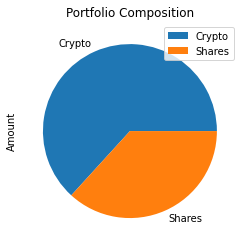

In [68]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title= "Portfolio Composition")

<AxesSubplot:title={'center':'Portfolio Composition'}>

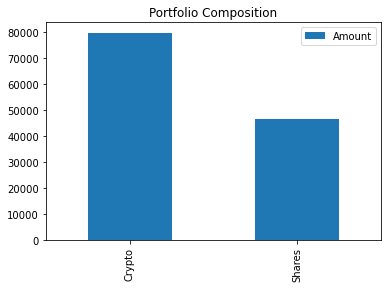

In [69]:
df_savings.plot.bar(y="Amount", title="Portfolio Composition")

In [70]:
# Set ideal emergency fund
emergency_fund = (monthly_income * 3)

if emergency_funds > total_investment:
    print("Congrats, you have enough if 'ish hits the fan!")
else:
    print("Oh no, hit the pavement and start makin' that bank....you're broke!")
    
# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

Oh no, hit the pavement and start makin' that bank....you're broke!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [71]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [72]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
# Get 3 year's worth of historical price data for Microsoft and Coca-Cola

tickers = ["SPY", "AGG"]
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [73]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [74]:
# Printing the simulation input data
MC_30year.portfolio_data.head()
# YOUR CODE HERE!

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [75]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
np.random.seed(0)
MC_30year.calc_cumulative_return()
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Taylor\Fintech\UTOR-VIRT-FIN-PT-11-2021-U-C\05-APIs\Unit 5 Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005864,0.991790,1.002448,0.995899,1.000889,1.000095,0.997868,0.992423,1.014038,1.004840,...,1.003046,1.002996,1.004489,1.000722,1.001943,1.010112,1.002403,0.991295,1.001894,1.004076
2,1.015148,0.988362,0.998039,0.999004,1.007733,0.996943,0.998954,0.987831,1.010303,1.001068,...,1.003411,1.007341,1.008357,1.005513,0.994329,1.010375,1.001586,0.991649,1.005426,1.008286
3,1.014893,0.995082,0.998061,1.003214,1.005939,0.996010,1.003219,0.981754,1.010955,0.998243,...,0.997079,1.011610,1.008476,1.004986,0.984049,1.016293,1.017073,0.996793,1.015976,1.006023
4,1.017686,0.992068,1.010945,1.007834,1.001075,0.990713,0.997368,0.984209,1.014393,0.989646,...,0.991198,1.015293,1.015866,1.020792,0.987630,1.014052,1.019781,1.001075,1.022842,1.007762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.997714,6.117170,13.553828,6.249755,7.142026,25.974494,28.498492,13.371645,30.357201,11.088833,...,4.812981,7.088793,4.289068,10.915537,6.675142,9.358980,7.397906,11.184508,1.997747,7.724186
7557,5.009379,6.215540,13.569734,6.256054,7.174955,26.116810,28.536706,13.464007,30.334662,11.095892,...,4.812352,7.040714,4.324389,10.864059,6.688355,9.230257,7.382808,11.236518,2.003485,7.769125
7558,4.996749,6.220797,13.550601,6.267739,7.171817,25.864884,28.882729,13.541412,30.419561,11.047820,...,4.806026,7.055552,4.330698,10.834950,6.629611,9.276099,7.439309,11.233841,2.009427,7.755491
7559,4.995426,6.192071,13.444082,6.281416,7.155527,25.783386,29.007117,13.529824,30.296559,11.139063,...,4.794831,7.042188,4.322418,10.746233,6.622177,9.267606,7.427339,11.200737,1.991189,7.821111


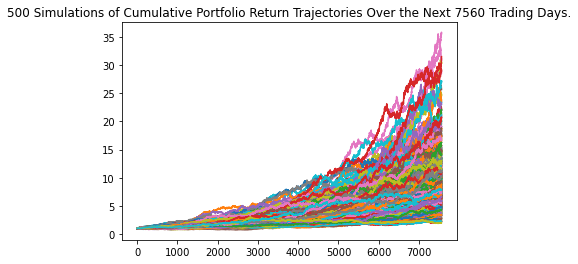

In [76]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

# YOUR CODE HERE!

In [77]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

count           500.000000
mean              9.349759
std               4.921126
min               1.977750
25%               6.137834
50%               8.330632
75%              11.259690
max              35.620173
95% CI Lower      3.215396
95% CI Upper     22.128979
Name: 7560, dtype: float64


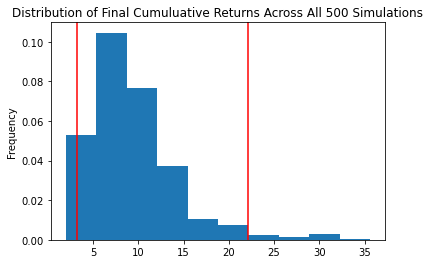

In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
dist_plot = MC_30year.plot_distribution()
# Print summary statistics

tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)



### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [79]:
# Set initial investment
initial_investment = 20000

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!



There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $64307.92 and $442579.59


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [80]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

ci_lower = round(tbl[8]*20000*1.5,2)
ci_upper = round(tbl[9]*20000*1.5,2)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $96461.89 and $663869.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")